___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe

pd.set_option('display.max_columns', None)

In [2]:
bc = pd.read_csv("Churn_Modelling.csv")

In [3]:
bc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
from skimpy import clean_columns
bc = clean_columns(bc)

14 column names have been cleaned

In [5]:
bc.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
bc.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
bc.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
bc.shape

(10000, 14)

In [9]:
bc.isna().sum().sum()

0

In [10]:
bc.duplicated().sum()

0

In [11]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customer_id,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
credit_score,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
num_of_products,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
has_cr_card,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
is_active_member,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimated_salary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [12]:
bc.describe(include="O").T

,count,unique,top,freq
surname,10000,2932,Smith,32
geography,10000,3,France,5014
gender,10000,2,Male,5457


In [13]:
bc["geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [14]:
bc["gender"].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [15]:
bc.replace({"gender":{"Male":0, "Female":1}, "geography":{"France":0, "Germany":1, "Spain":2}}, inplace=True)

In [16]:
bc["gender"].value_counts()

0    5457
1    4543
Name: gender, dtype: int64

In [17]:
bc["geography"].value_counts()

0    5014
1    2509
2    2477
Name: geography, dtype: int64

In [18]:
bc.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,0,1,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,2,1,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,0,1,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,0,1,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.820,1,1,1,79084.100,0


In [19]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  int64  
 5   gender            10000 non-null  int64  
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [20]:
bc.shape

(10000, 14)

In [21]:
bc.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [22]:
drop_list = ["row_number", "customer_id", "surname"]

In [23]:
bc = bc.drop(columns=drop_list)

In [24]:
bc.shape

(10000, 11)

<AxesSubplot:>

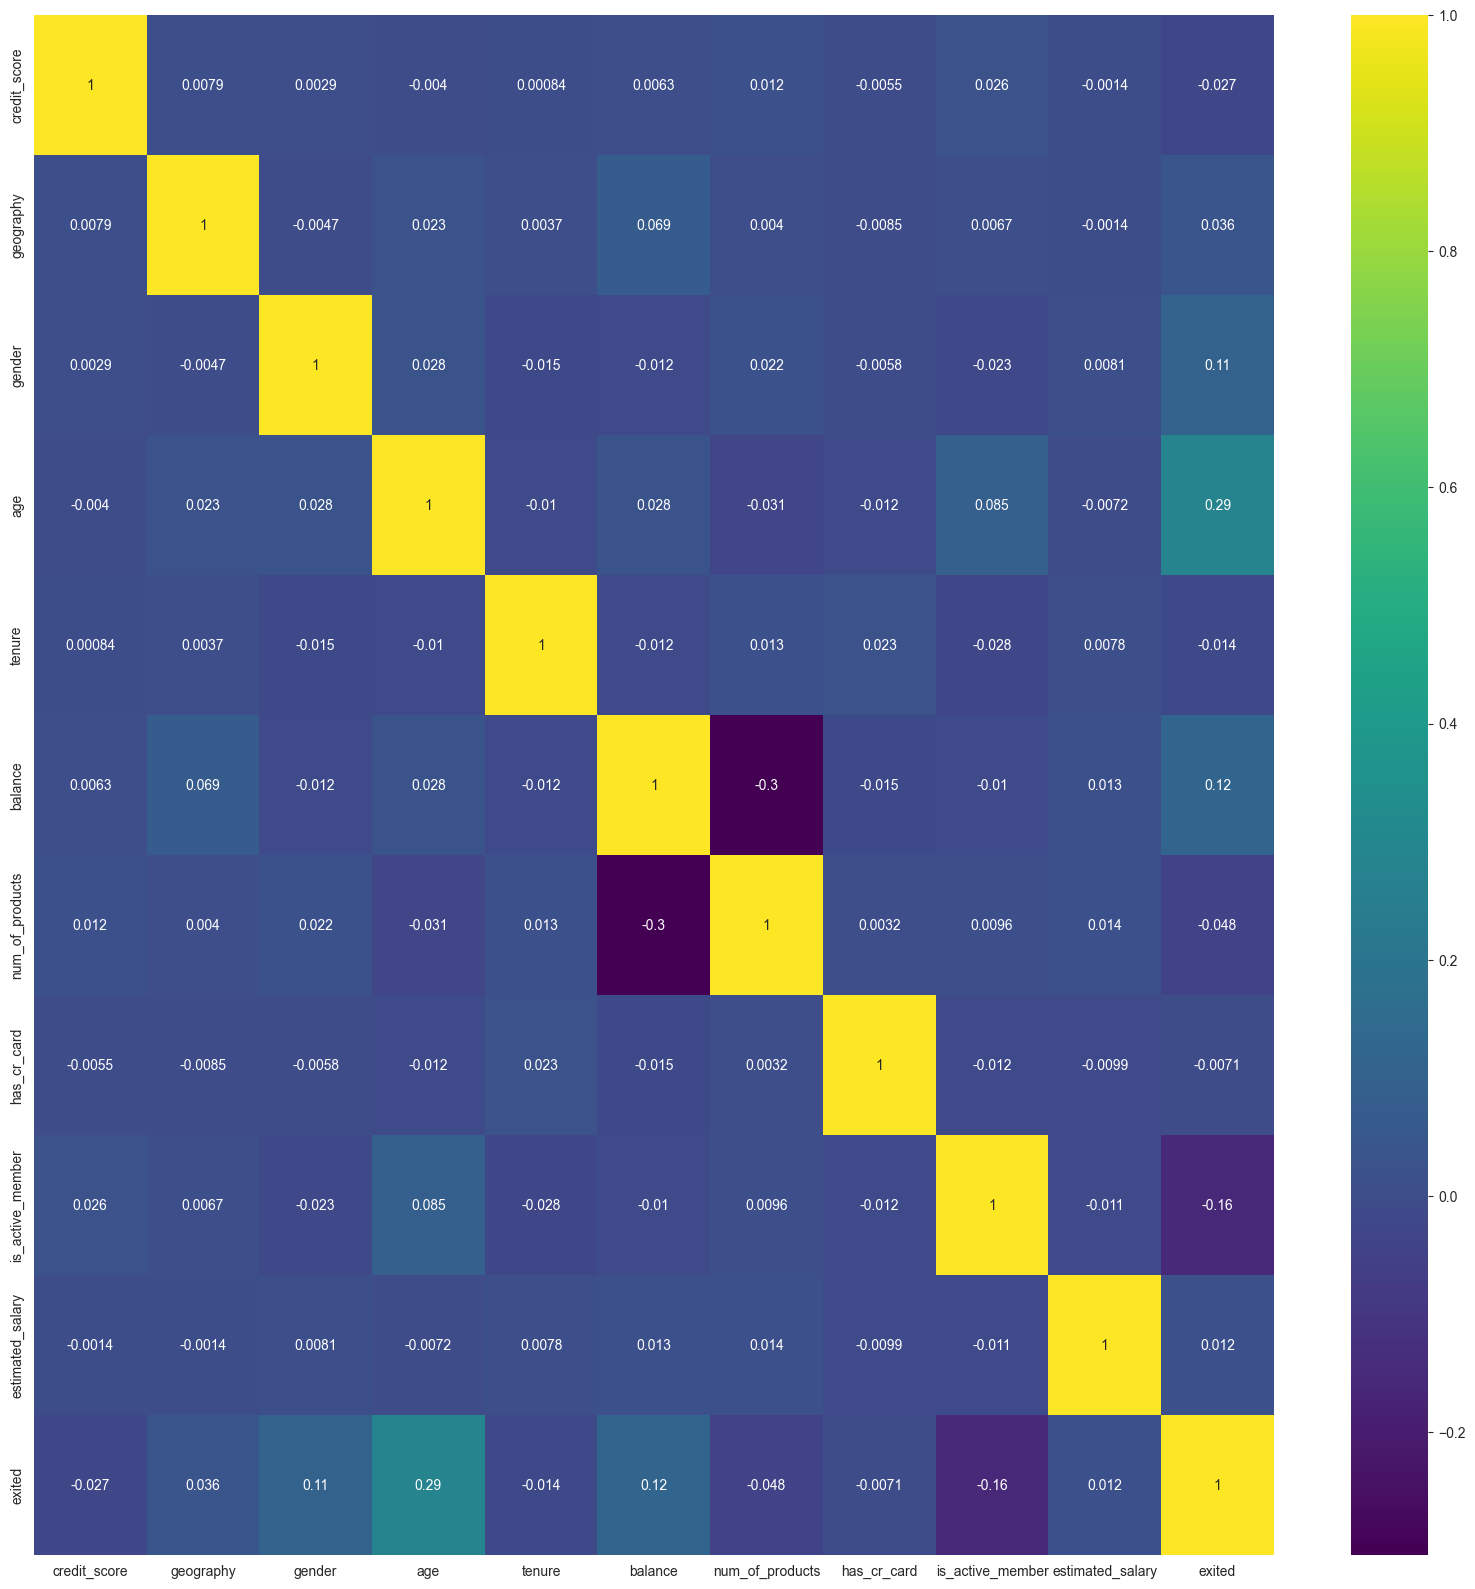

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(bc.corr(), annot=True, cmap="viridis")

0    7963
1    2037
Name: exited, dtype: int64


<AxesSubplot:ylabel='count'>

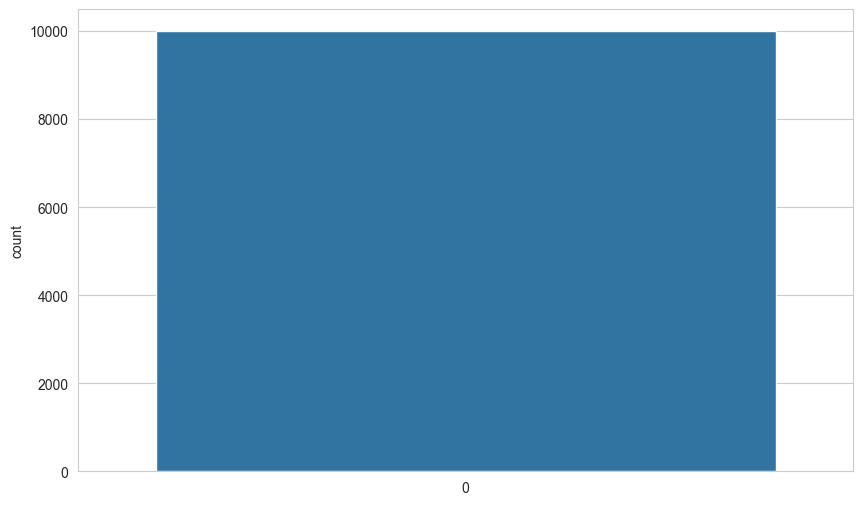

In [26]:
print(bc.exited.value_counts())
sns.countplot(bc["exited"])

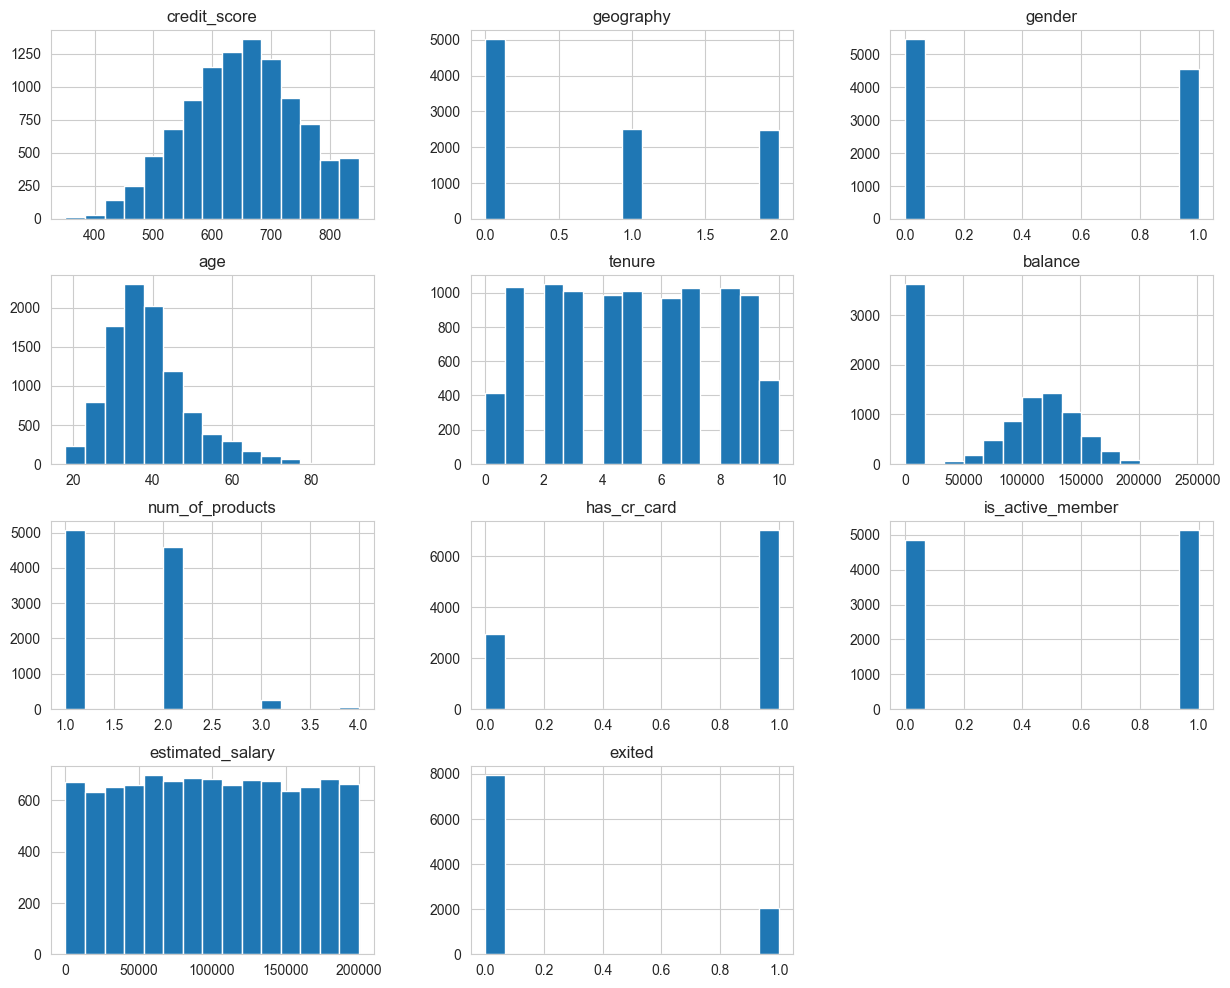

In [27]:
bc.hist(figsize=(15, 12), bins=15);

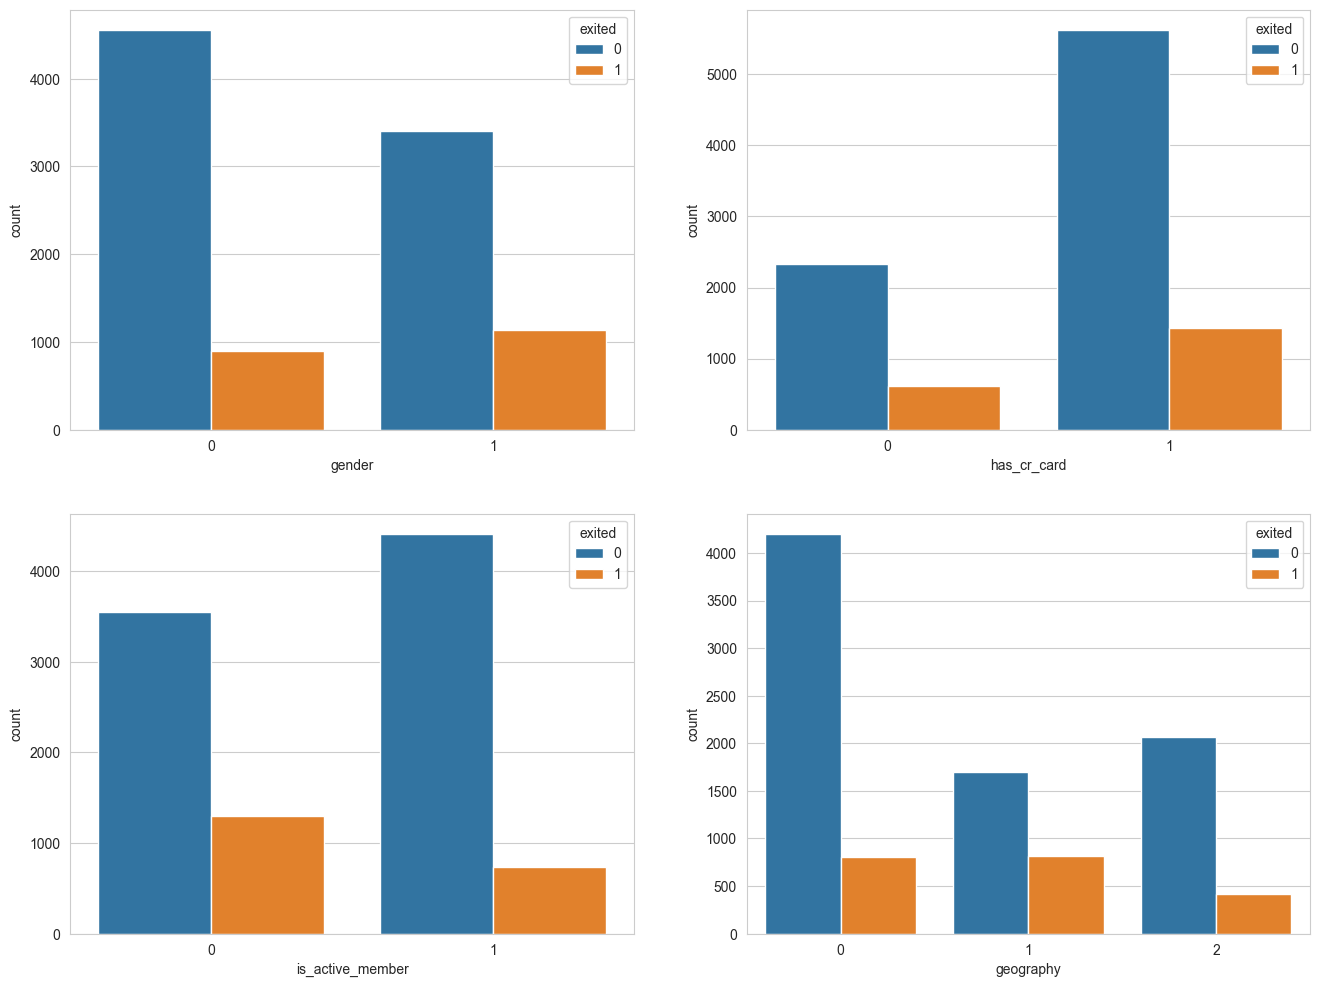

In [28]:
cat_list = ["gender", "has_cr_card", "is_active_member", "geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=bc, x=i, hue="exited")

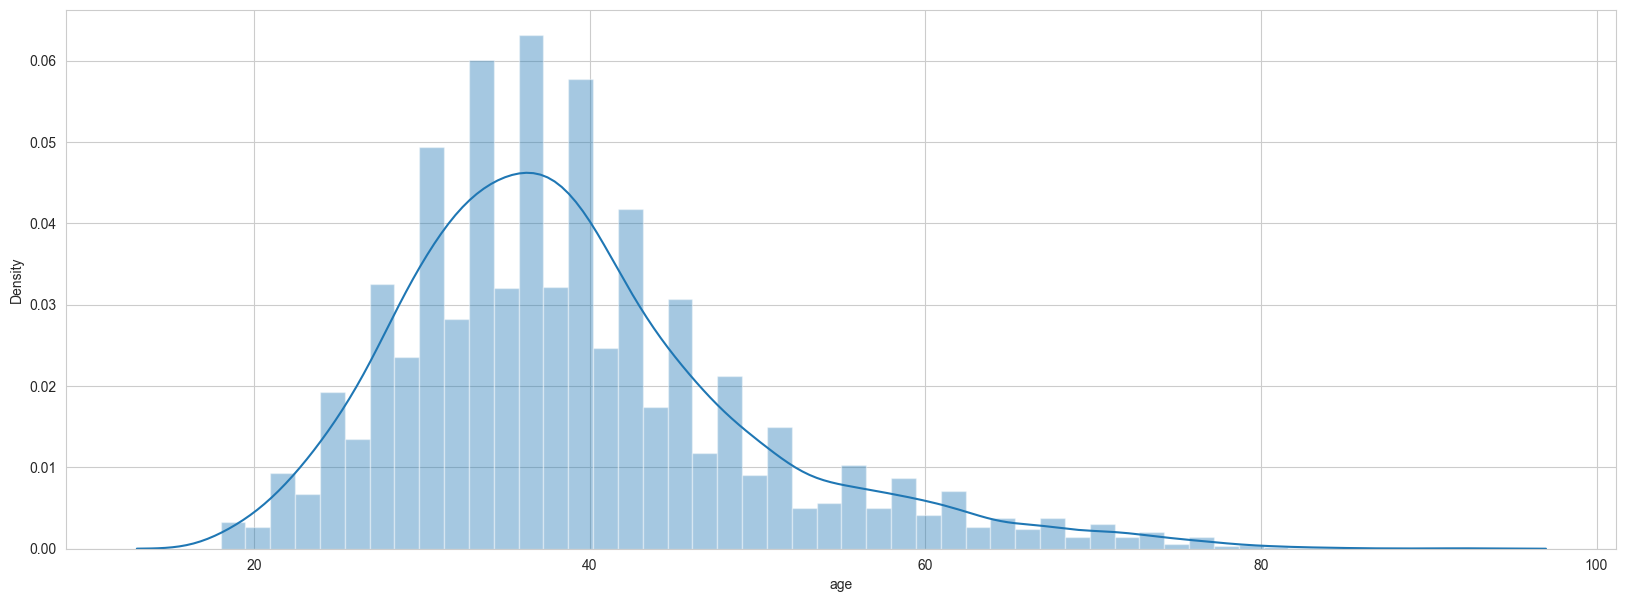

In [29]:
plt.figure(figsize=(20, 7));
sns.distplot(bc["age"]);

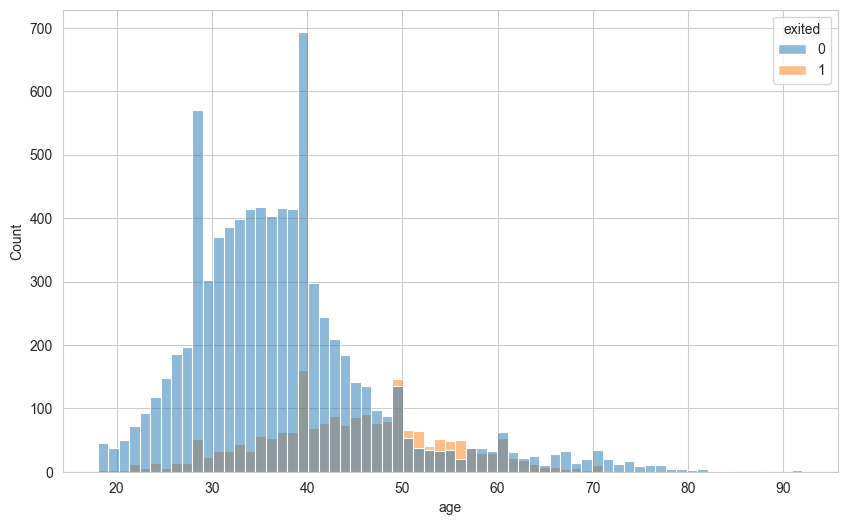

In [30]:
sns.histplot(data=bc, x="age", hue="exited", fill=True);

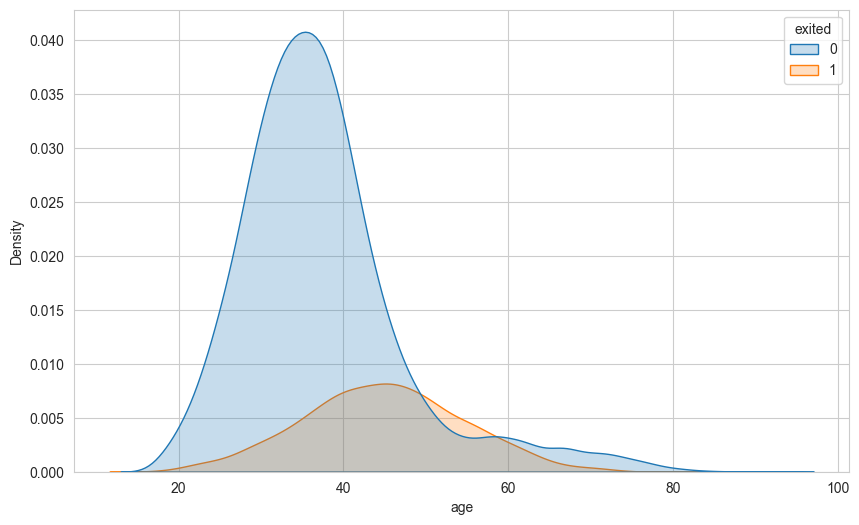

In [31]:
sns.kdeplot(data=bc, x="age", hue="exited", fill=True);

In [33]:
plt.figure(figsize=(20, 7))
sns.countplot(bc.age, hue=bc["exited"]);

ValueError: Cannot use `hue` without `x` and `y`

<Figure size 2000x700 with 0 Axes>

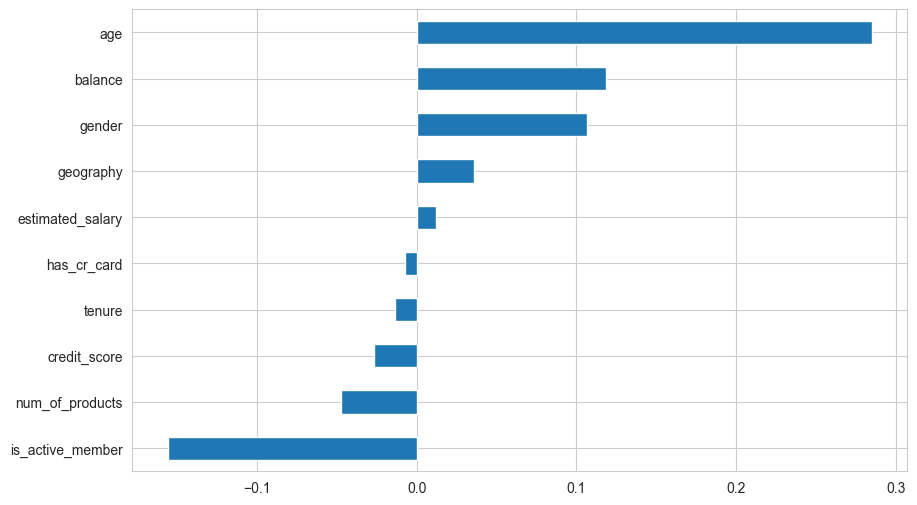

In [34]:
bc.corr()["exited"][:-1].sort_values().plot.barh();

# Preprocessing of Data
- Train | Test Split, Scalling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
seed = 101

In [36]:
X = bc.drop(columns="exited")
y = bc["exited"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y,stratify=y, 
                                                    test_size=0.2, random_state=seed)

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8000, 10)
Train target shape   :  (8000,)
Test features shape  :  (2000, 10)
Test target shape    :  (2000,)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [44]:
seed = 101
import numpy as np
import tensorflow as tf
import random as python_random

def reset_seeds():
   np.random.seed(seed) 
   python_random.seed(seed)
   tf.random.set_seed(seed)

In [45]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8000, 10)
Train target shape   :  (8000,)
Test features shape  :  (2000, 10)
Test target shape    :  (2000,)


In [46]:
reset_seeds() 

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

2022-10-04 18:02:04.908291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=100, epochs=300, verbose=1)

Epoch 1/300
72/72 [==============================] - 1s 9ms/step - loss: 0.5647 - recall: 0.0761 - val_loss: 0.4855 - val_recall: 0.0000e+00
Epoch 2/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4879 - recall: 0.0000e+00 - val_loss: 0.4645 - val_recall: 0.0000e+00
Epoch 3/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4704 - recall: 0.0000e+00 - val_loss: 0.4505 - val_recall: 0.0127
Epoch 4/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4558 - recall: 0.0217 - val_loss: 0.4383 - val_recall: 0.0570
Epoch 5/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4441 - recall: 0.0836 - val_loss: 0.4284 - val_recall: 0.1076
Epoch 6/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4362 - recall: 0.1325 - val_loss: 0.4233 - val_recall: 0.1139
Epoch 7/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4304 - recall: 0.1658 - val_loss: 0.4176 - val_recall: 0.1519
Epoch 8/300
72/72 [======

72/72 [==============================] - 0s 3ms/step - loss: 0.3180 - recall: 0.5122 - val_loss: 0.3507 - val_recall: 0.5127
Epoch 61/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3174 - recall: 0.5183 - val_loss: 0.3528 - val_recall: 0.5443
Epoch 62/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3166 - recall: 0.5041 - val_loss: 0.3629 - val_recall: 0.5570
Epoch 63/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3161 - recall: 0.5149 - val_loss: 0.3522 - val_recall: 0.5443
Epoch 64/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3161 - recall: 0.5183 - val_loss: 0.3567 - val_recall: 0.5570
Epoch 65/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3156 - recall: 0.5129 - val_loss: 0.3521 - val_recall: 0.4810
Epoch 66/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3155 - recall: 0.5183 - val_loss: 0.3507 - val_recall: 0.5253
Epoch 67/300
72/72 [===========================

72/72 [==============================] - 0s 3ms/step - loss: 0.3061 - recall: 0.5387 - val_loss: 0.3611 - val_recall: 0.6013
Epoch 120/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3059 - recall: 0.5523 - val_loss: 0.3599 - val_recall: 0.5190
Epoch 121/300
72/72 [==============================] - 0s 4ms/step - loss: 0.3046 - recall: 0.5476 - val_loss: 0.3548 - val_recall: 0.5506
Epoch 122/300
72/72 [==============================] - 0s 6ms/step - loss: 0.3078 - recall: 0.5340 - val_loss: 0.3590 - val_recall: 0.5570
Epoch 123/300
72/72 [==============================] - 0s 4ms/step - loss: 0.3057 - recall: 0.5482 - val_loss: 0.3641 - val_recall: 0.5823
Epoch 124/300
72/72 [==============================] - 1s 14ms/step - loss: 0.3041 - recall: 0.5462 - val_loss: 0.3618 - val_recall: 0.5127
Epoch 125/300
72/72 [==============================] - 1s 16ms/step - loss: 0.3052 - recall: 0.5469 - val_loss: 0.3594 - val_recall: 0.5000
Epoch 126/300
72/72 [==================

72/72 [==============================] - 0s 2ms/step - loss: 0.2997 - recall: 0.5557 - val_loss: 0.3588 - val_recall: 0.5190
Epoch 179/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2995 - recall: 0.5550 - val_loss: 0.3641 - val_recall: 0.5127
Epoch 180/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2995 - recall: 0.5516 - val_loss: 0.3653 - val_recall: 0.5633
Epoch 181/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2990 - recall: 0.5584 - val_loss: 0.3639 - val_recall: 0.5316
Epoch 182/300
72/72 [==============================] - 0s 2ms/step - loss: 0.2987 - recall: 0.5584 - val_loss: 0.3628 - val_recall: 0.5253
Epoch 183/300
72/72 [==============================] - 0s 2ms/step - loss: 0.2981 - recall: 0.5591 - val_loss: 0.3870 - val_recall: 0.6266
Epoch 184/300
72/72 [==============================] - 0s 2ms/step - loss: 0.2986 - recall: 0.5659 - val_loss: 0.3656 - val_recall: 0.5570
Epoch 185/300
72/72 [====================

72/72 [==============================] - 0s 3ms/step - loss: 0.2956 - recall: 0.5577 - val_loss: 0.3762 - val_recall: 0.5759
Epoch 238/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2955 - recall: 0.5577 - val_loss: 0.3661 - val_recall: 0.5570
Epoch 239/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2936 - recall: 0.5713 - val_loss: 0.3729 - val_recall: 0.5949
Epoch 240/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2947 - recall: 0.5625 - val_loss: 0.3652 - val_recall: 0.5253
Epoch 241/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2938 - recall: 0.5713 - val_loss: 0.3749 - val_recall: 0.5127
Epoch 242/300
72/72 [==============================] - 0s 4ms/step - loss: 0.2947 - recall: 0.5652 - val_loss: 0.3612 - val_recall: 0.5443
Epoch 243/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2966 - recall: 0.5503 - val_loss: 0.3747 - val_recall: 0.6203
Epoch 244/300
72/72 [====================

72/72 [==============================] - 0s 2ms/step - loss: 0.2908 - recall: 0.5727 - val_loss: 0.3783 - val_recall: 0.5823
Epoch 297/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2912 - recall: 0.5632 - val_loss: 0.3796 - val_recall: 0.6266
Epoch 298/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2930 - recall: 0.5700 - val_loss: 0.3826 - val_recall: 0.6139
Epoch 299/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2919 - recall: 0.5747 - val_loss: 0.3764 - val_recall: 0.5696
Epoch 300/300
72/72 [==============================] - 0s 3ms/step - loss: 0.2908 - recall: 0.5822 - val_loss: 0.3694 - val_recall: 0.5316


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [49]:
loss_bc = pd.DataFrame(model.history.history)
loss_bc.head()

,loss,recall,val_loss,val_recall
0,0.565,0.076,0.486,0.000
1,0.488,0.000,0.465,0.000
2,0.470,0.000,0.450,0.013
3,0.456,0.022,0.438,0.057
4,0.444,0.084,0.428,0.108


In [50]:
loss_bc["loss"].sort_values(ascending=True)

294   0.290
299   0.291
292   0.291
295   0.291
286   0.291
       ... 
4     0.444
3     0.456
2     0.470
1     0.488
0     0.565
Name: loss, Length: 300, dtype: float64

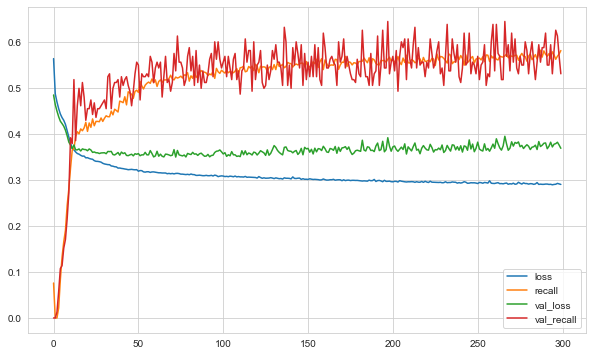

In [51]:
loss_bc.plot();

In [52]:
model.evaluate(X_test, y_test, verbose=0)

[0.40932467579841614, 0.40294840931892395]

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.40932467579841614
accuracy :  0.40294840931892395


In [54]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1525   68]
 [ 243  164]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.71      0.40      0.51       407

    accuracy                           0.84      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



## Precision-Recall Curve and AP (Average Precision) for model

63/63 [==============================] - 0s 2ms/step


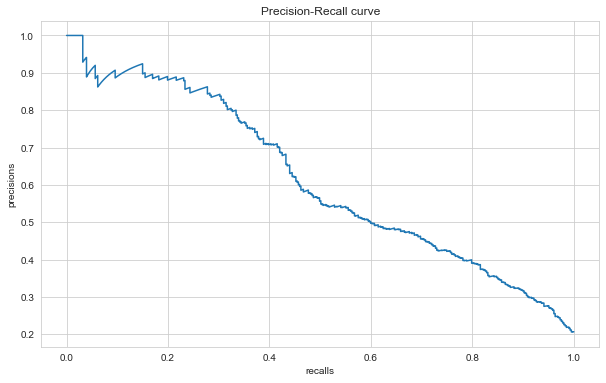

In [55]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="ANN")
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.title("Precision-Recall curve")
plt.show()

In [57]:
average_precision_score(y_test, y_pred_proba)

0.6141072013859008

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [58]:
reset_seeds() 

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [59]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [60]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
72/72 [==============================] - 1s 7ms/step - loss: 0.6791 - recall: 0.6236 - val_loss: 0.6618 - val_recall: 0.6835
Epoch 2/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6537 - recall: 0.6359 - val_loss: 0.6188 - val_recall: 0.6519
Epoch 3/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6258 - recall: 0.6562 - val_loss: 0.6240 - val_recall: 0.7278
Epoch 4/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6023 - recall: 0.6889 - val_loss: 0.6107 - val_recall: 0.7405
Epoch 5/300
72/72 [==============================] - 0s 4ms/step - loss: 0.5842 - recall: 0.7147 - val_loss: 0.5650 - val_recall: 0.7025
Epoch 6/300
72/72 [==============================] - 0s 3ms/step - loss: 0.5679 - recall: 0.7140 - val_loss: 0.5404 - val_recall: 0.6772
Epoch 7/300
72/72 [==============================] - 0s 3ms/step - loss: 0.5530 - recall: 0.7303 - val_loss: 0.5317 - val_recall: 0.6772
Epoch 8/300
72/72 [======================

72/72 [==============================] - 1s 7ms/step - loss: 0.4419 - recall: 0.7840 - val_loss: 0.4586 - val_recall: 0.7342
Epoch 61/300
72/72 [==============================] - 1s 8ms/step - loss: 0.4404 - recall: 0.7860 - val_loss: 0.4739 - val_recall: 0.7405
Epoch 62/300
72/72 [==============================] - 1s 11ms/step - loss: 0.4395 - recall: 0.7792 - val_loss: 0.5264 - val_recall: 0.7722
Epoch 63/300
72/72 [==============================] - 1s 9ms/step - loss: 0.4396 - recall: 0.7874 - val_loss: 0.4715 - val_recall: 0.7405
Epoch 64/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4376 - recall: 0.7921 - val_loss: 0.5174 - val_recall: 0.7785
Epoch 65/300
72/72 [==============================] - 1s 7ms/step - loss: 0.4385 - recall: 0.7812 - val_loss: 0.4516 - val_recall: 0.7215
Epoch 66/300
72/72 [==============================] - 1s 10ms/step - loss: 0.4387 - recall: 0.7874 - val_loss: 0.4854 - val_recall: 0.7405
Epoch 67/300
72/72 [=========================

72/72 [==============================] - 1s 7ms/step - loss: 0.4176 - recall: 0.8023 - val_loss: 0.5100 - val_recall: 0.7658
Epoch 120/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4188 - recall: 0.7989 - val_loss: 0.4739 - val_recall: 0.7468
Epoch 121/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4177 - recall: 0.8030 - val_loss: 0.4577 - val_recall: 0.7278
Epoch 122/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4210 - recall: 0.7976 - val_loss: 0.4906 - val_recall: 0.7532
Epoch 123/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4174 - recall: 0.7989 - val_loss: 0.5193 - val_recall: 0.7785
Epoch 124/300
72/72 [==============================] - 0s 7ms/step - loss: 0.4178 - recall: 0.8077 - val_loss: 0.4885 - val_recall: 0.7595
Epoch 125/300
72/72 [==============================] - 1s 7ms/step - loss: 0.4166 - recall: 0.8030 - val_loss: 0.4607 - val_recall: 0.7405
Epoch 126/300
72/72 [====================

Epoch 178/300
72/72 [==============================] - 0s 5ms/step - loss: 0.4036 - recall: 0.8118 - val_loss: 0.4915 - val_recall: 0.7532
Epoch 179/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4063 - recall: 0.8159 - val_loss: 0.4708 - val_recall: 0.7532
Epoch 180/300
72/72 [==============================] - 0s 5ms/step - loss: 0.4037 - recall: 0.8125 - val_loss: 0.4868 - val_recall: 0.7532
Epoch 181/300
72/72 [==============================] - 0s 5ms/step - loss: 0.4032 - recall: 0.8132 - val_loss: 0.4518 - val_recall: 0.7342
Epoch 182/300
72/72 [==============================] - 1s 7ms/step - loss: 0.4018 - recall: 0.8084 - val_loss: 0.4631 - val_recall: 0.7468
Epoch 183/300
72/72 [==============================] - 1s 8ms/step - loss: 0.4022 - recall: 0.8023 - val_loss: 0.5684 - val_recall: 0.8038
Epoch 184/300
72/72 [==============================] - 0s 7ms/step - loss: 0.4027 - recall: 0.8159 - val_loss: 0.4800 - val_recall: 0.7532
Epoch 185/300
72/72 [======

Epoch 237/300
72/72 [==============================] - 1s 9ms/step - loss: 0.3920 - recall: 0.8166 - val_loss: 0.4869 - val_recall: 0.7532
Epoch 238/300
72/72 [==============================] - 0s 5ms/step - loss: 0.3942 - recall: 0.8145 - val_loss: 0.4724 - val_recall: 0.7532
Epoch 239/300
72/72 [==============================] - 0s 5ms/step - loss: 0.3933 - recall: 0.8186 - val_loss: 0.5508 - val_recall: 0.8101
Epoch 240/300
72/72 [==============================] - 0s 7ms/step - loss: 0.3936 - recall: 0.8125 - val_loss: 0.4675 - val_recall: 0.7405
Epoch 241/300
72/72 [==============================] - 0s 6ms/step - loss: 0.3920 - recall: 0.8173 - val_loss: 0.4539 - val_recall: 0.7215
Epoch 242/300
72/72 [==============================] - 0s 6ms/step - loss: 0.3942 - recall: 0.8159 - val_loss: 0.4599 - val_recall: 0.7468
Epoch 243/300
72/72 [==============================] - 0s 7ms/step - loss: 0.3951 - recall: 0.8091 - val_loss: 0.5495 - val_recall: 0.7911
Epoch 244/300
72/72 [======

Epoch 296/300
72/72 [==============================] - 0s 6ms/step - loss: 0.3829 - recall: 0.8247 - val_loss: 0.4949 - val_recall: 0.7595
Epoch 297/300
72/72 [==============================] - 0s 6ms/step - loss: 0.3854 - recall: 0.8247 - val_loss: 0.5128 - val_recall: 0.7595
Epoch 298/300
72/72 [==============================] - 0s 6ms/step - loss: 0.3845 - recall: 0.8227 - val_loss: 0.5173 - val_recall: 0.7532
Epoch 299/300
72/72 [==============================] - 1s 7ms/step - loss: 0.3826 - recall: 0.8173 - val_loss: 0.4968 - val_recall: 0.7532
Epoch 300/300
72/72 [==============================] - 0s 6ms/step - loss: 0.3807 - recall: 0.8240 - val_loss: 0.4540 - val_recall: 0.7278


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

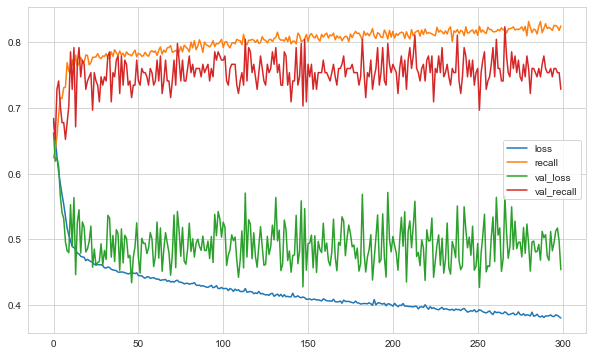

In [61]:
loss_bc = pd.DataFrame(model.history.history)
loss_bc.plot();

In [62]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 4ms/step
[[1327  266]
 [ 158  249]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1593
           1       0.48      0.61      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.79      0.80      2000



## Precision-Recall Curve and AP (Average Precision) for model

63/63 [==============================] - 0s 3ms/step


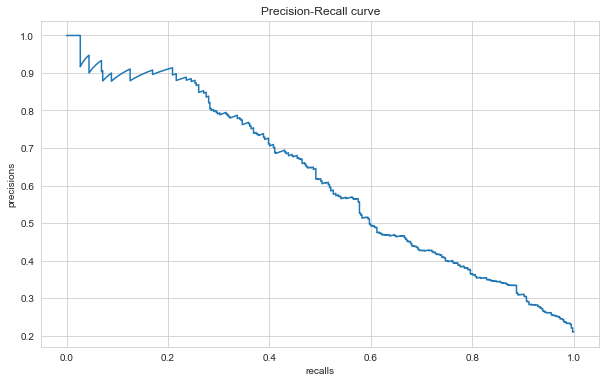

In [63]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="ANN")
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.title("Precision-Recall curve")
plt.show()

In [64]:
average_precision_score(y_test, y_pred_proba)

0.616763502577558

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [65]:
reset_seeds() 

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [66]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
72/72 [==============================] - 2s 12ms/step - loss: 0.6517 - recall: 0.6562 - val_loss: 0.5699 - val_recall: 0.6456
Epoch 2/300
72/72 [==============================] - 0s 6ms/step - loss: 0.5979 - recall: 0.6970 - val_loss: 0.5324 - val_recall: 0.6329
Epoch 3/300
72/72 [==============================] - 0s 7ms/step - loss: 0.5465 - recall: 0.7296 - val_loss: 0.5138 - val_recall: 0.6962
Epoch 4/300
72/72 [==============================] - 0s 7ms/step - loss: 0.5063 - recall: 0.7473 - val_loss: 0.5575 - val_recall: 0.8228
Epoch 5/300
72/72 [==============================] - 1s 12ms/step - loss: 0.4920 - recall: 0.7575 - val_loss: 0.4763 - val_recall: 0.7215
Epoch 6/300
72/72 [==============================] - 1s 8ms/step - loss: 0.4925 - recall: 0.7561 - val_loss: 0.5538 - val_recall: 0.8038
Epoch 7/300
72/72 [==============================] - 1s 14ms/step - loss: 0.4852 - recall: 0.7520 - val_loss: 0.6138 - val_recall: 0.8481
Epoch 8/300
72/72 [===================

72/72 [==============================] - 1s 8ms/step - loss: 0.4056 - recall: 0.8043 - val_loss: 0.5391 - val_recall: 0.7658
Epoch 61/300
72/72 [==============================] - 1s 11ms/step - loss: 0.4094 - recall: 0.7976 - val_loss: 0.4809 - val_recall: 0.7532
Epoch 62/300
72/72 [==============================] - 1s 14ms/step - loss: 0.4046 - recall: 0.8016 - val_loss: 0.5533 - val_recall: 0.7595
Epoch 63/300
72/72 [==============================] - 1s 11ms/step - loss: 0.4045 - recall: 0.8010 - val_loss: 0.5170 - val_recall: 0.7658
Epoch 64/300
72/72 [==============================] - 1s 10ms/step - loss: 0.3991 - recall: 0.7921 - val_loss: 0.5451 - val_recall: 0.7848
Epoch 65/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4027 - recall: 0.8057 - val_loss: 0.4469 - val_recall: 0.7152
Epoch 66/300
72/72 [==============================] - 0s 6ms/step - loss: 0.4004 - recall: 0.7989 - val_loss: 0.4826 - val_recall: 0.7278
Epoch 67/300
72/72 [=======================

72/72 [==============================] - 0s 3ms/step - loss: 0.3588 - recall: 0.8356 - val_loss: 0.5424 - val_recall: 0.7468
Epoch 120/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3629 - recall: 0.8288 - val_loss: 0.5153 - val_recall: 0.7215
Epoch 121/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3663 - recall: 0.8288 - val_loss: 0.5380 - val_recall: 0.7089
Epoch 122/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3705 - recall: 0.8213 - val_loss: 0.5962 - val_recall: 0.7658
Epoch 123/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3641 - recall: 0.8302 - val_loss: 0.5653 - val_recall: 0.7278
Epoch 124/300
72/72 [==============================] - 0s 2ms/step - loss: 0.3578 - recall: 0.8376 - val_loss: 0.5649 - val_recall: 0.7089
Epoch 125/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3585 - recall: 0.8363 - val_loss: 0.5411 - val_recall: 0.7152
Epoch 126/300
72/72 [====================

72/72 [==============================] - 0s 3ms/step - loss: 0.3413 - recall: 0.8580 - val_loss: 0.5406 - val_recall: 0.6899
Epoch 179/300
72/72 [==============================] - 0s 5ms/step - loss: 0.3422 - recall: 0.8471 - val_loss: 0.5507 - val_recall: 0.6899
Epoch 180/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3463 - recall: 0.8512 - val_loss: 0.5611 - val_recall: 0.6962
Epoch 181/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3424 - recall: 0.8539 - val_loss: 0.5830 - val_recall: 0.7152
Epoch 182/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3424 - recall: 0.8499 - val_loss: 0.5507 - val_recall: 0.6709
Epoch 183/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3336 - recall: 0.8458 - val_loss: 0.6125 - val_recall: 0.7278
Epoch 184/300
72/72 [==============================] - 0s 4ms/step - loss: 0.3366 - recall: 0.8485 - val_loss: 0.5064 - val_recall: 0.7025
Epoch 185/300
72/72 [====================

72/72 [==============================] - 0s 3ms/step - loss: 0.3250 - recall: 0.8573 - val_loss: 0.5506 - val_recall: 0.6709
Epoch 238/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3175 - recall: 0.8594 - val_loss: 0.6472 - val_recall: 0.7089
Epoch 239/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3224 - recall: 0.8560 - val_loss: 0.5581 - val_recall: 0.6582
Epoch 240/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3186 - recall: 0.8607 - val_loss: 0.6312 - val_recall: 0.7342
Epoch 241/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3218 - recall: 0.8573 - val_loss: 0.5780 - val_recall: 0.7089
Epoch 242/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3147 - recall: 0.8560 - val_loss: 0.5378 - val_recall: 0.6772
Epoch 243/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3222 - recall: 0.8621 - val_loss: 0.6426 - val_recall: 0.7152
Epoch 244/300
72/72 [====================

72/72 [==============================] - 0s 3ms/step - loss: 0.3128 - recall: 0.8709 - val_loss: 0.6394 - val_recall: 0.7278
Epoch 297/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3189 - recall: 0.8668 - val_loss: 0.5727 - val_recall: 0.6835
Epoch 298/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3054 - recall: 0.8702 - val_loss: 0.5980 - val_recall: 0.7089
Epoch 299/300
72/72 [==============================] - 0s 4ms/step - loss: 0.3007 - recall: 0.8689 - val_loss: 0.6219 - val_recall: 0.7152
Epoch 300/300
72/72 [==============================] - 0s 3ms/step - loss: 0.3002 - recall: 0.8777 - val_loss: 0.5654 - val_recall: 0.6519


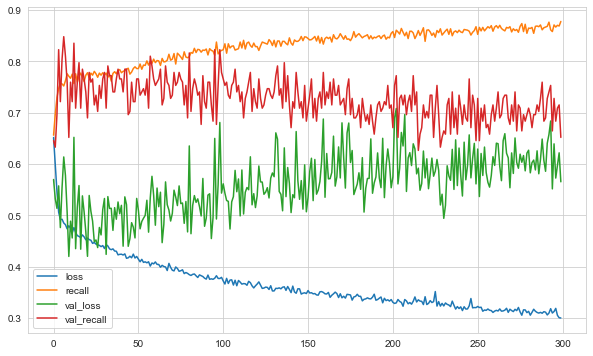

In [67]:
loss_bc = pd.DataFrame(model.history.history)
loss_bc.plot();

In [68]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1362  231]
 [ 183  224]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1593
           1       0.49      0.55      0.52       407

    accuracy                           0.79      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000



### Add Dropout Layer

In [69]:
reset_seeds() 

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001) 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [70]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
72/72 [==============================] - 1s 6ms/step - loss: 0.6829 - recall: 0.6250 - val_loss: 0.6639 - val_recall: 0.6899
Epoch 2/300
72/72 [==============================] - 0s 4ms/step - loss: 0.6739 - recall: 0.5842 - val_loss: 0.6569 - val_recall: 0.7089
Epoch 3/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6653 - recall: 0.6155 - val_loss: 0.6451 - val_recall: 0.6835
Epoch 4/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6532 - recall: 0.6060 - val_loss: 0.6138 - val_recall: 0.6456
Epoch 5/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6482 - recall: 0.6033 - val_loss: 0.6372 - val_recall: 0.7152
Epoch 6/300
72/72 [==============================] - 0s 4ms/step - loss: 0.6368 - recall: 0.6318 - val_loss: 0.6069 - val_recall: 0.6772
Epoch 7/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6274 - recall: 0.6562 - val_loss: 0.6137 - val_recall: 0.7152
Epoch 8/300
72/72 [======================

72/72 [==============================] - 0s 3ms/step - loss: 0.4780 - recall: 0.7588 - val_loss: 0.5050 - val_recall: 0.7658
Epoch 61/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4725 - recall: 0.7704 - val_loss: 0.5087 - val_recall: 0.7722
Epoch 62/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4745 - recall: 0.7663 - val_loss: 0.4897 - val_recall: 0.7658
Epoch 63/300
72/72 [==============================] - 0s 4ms/step - loss: 0.4709 - recall: 0.7751 - val_loss: 0.4556 - val_recall: 0.7215
Epoch 64/300
72/72 [==============================] - 0s 5ms/step - loss: 0.4743 - recall: 0.7534 - val_loss: 0.4913 - val_recall: 0.7468
Epoch 65/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4773 - recall: 0.7609 - val_loss: 0.4813 - val_recall: 0.7532
Epoch 66/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4741 - recall: 0.7493 - val_loss: 0.4761 - val_recall: 0.7215
Epoch 67/300
72/72 [===========================

72/72 [==============================] - 0s 4ms/step - loss: 0.4580 - recall: 0.7704 - val_loss: 0.5034 - val_recall: 0.7532
Epoch 120/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4576 - recall: 0.7758 - val_loss: 0.4831 - val_recall: 0.7532
Epoch 121/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4617 - recall: 0.7670 - val_loss: 0.4620 - val_recall: 0.7532
Epoch 122/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4543 - recall: 0.7751 - val_loss: 0.4794 - val_recall: 0.7595
Epoch 123/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4543 - recall: 0.7697 - val_loss: 0.4846 - val_recall: 0.7595
Epoch 124/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4562 - recall: 0.7690 - val_loss: 0.4729 - val_recall: 0.7405
Epoch 125/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4593 - recall: 0.7779 - val_loss: 0.4790 - val_recall: 0.7595
Epoch 126/300
72/72 [====================

72/72 [==============================] - 0s 3ms/step - loss: 0.4505 - recall: 0.7833 - val_loss: 0.4748 - val_recall: 0.7405
Epoch 179/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4509 - recall: 0.7799 - val_loss: 0.4950 - val_recall: 0.7532
Epoch 180/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4535 - recall: 0.7677 - val_loss: 0.4617 - val_recall: 0.7468
Epoch 181/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4519 - recall: 0.7622 - val_loss: 0.4845 - val_recall: 0.7595
Epoch 182/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4541 - recall: 0.7880 - val_loss: 0.4622 - val_recall: 0.7152
Epoch 183/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4546 - recall: 0.7677 - val_loss: 0.4902 - val_recall: 0.7468
Epoch 184/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4486 - recall: 0.7826 - val_loss: 0.4866 - val_recall: 0.7595
Epoch 185/300
72/72 [====================

72/72 [==============================] - 0s 3ms/step - loss: 0.4474 - recall: 0.7887 - val_loss: 0.4915 - val_recall: 0.7532
Epoch 238/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4437 - recall: 0.7880 - val_loss: 0.4790 - val_recall: 0.7405
Epoch 239/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4523 - recall: 0.7683 - val_loss: 0.5169 - val_recall: 0.7785
Epoch 240/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4459 - recall: 0.7731 - val_loss: 0.4928 - val_recall: 0.7595
Epoch 241/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4509 - recall: 0.7867 - val_loss: 0.4770 - val_recall: 0.7405
Epoch 242/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4485 - recall: 0.7819 - val_loss: 0.4886 - val_recall: 0.7658
Epoch 243/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4437 - recall: 0.7935 - val_loss: 0.4763 - val_recall: 0.7468
Epoch 244/300
72/72 [====================

72/72 [==============================] - 0s 3ms/step - loss: 0.4467 - recall: 0.7806 - val_loss: 0.4650 - val_recall: 0.7595
Epoch 297/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4444 - recall: 0.7901 - val_loss: 0.4861 - val_recall: 0.7405
Epoch 298/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4411 - recall: 0.7914 - val_loss: 0.4757 - val_recall: 0.7595
Epoch 299/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4466 - recall: 0.7874 - val_loss: 0.4978 - val_recall: 0.7595
Epoch 300/300
72/72 [==============================] - 0s 3ms/step - loss: 0.4427 - recall: 0.7853 - val_loss: 0.4742 - val_recall: 0.7405


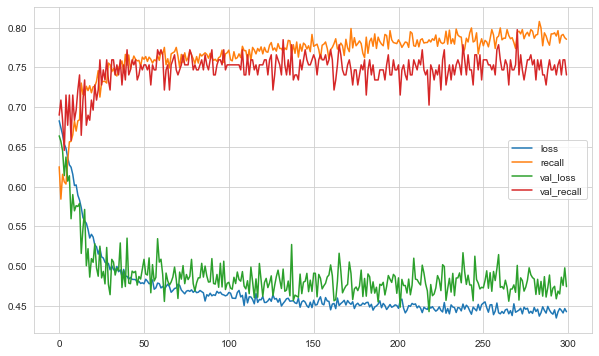

In [71]:
loss_bc = pd.DataFrame(model.history.history)
loss_bc.plot();

In [ ]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Early Stop

#### Monitor the "val_loss" as metric

In [72]:
reset_seeds() 

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005) 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [73]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [74]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
72/72 [==============================] - 1s 7ms/step - loss: 0.6767 - recall: 0.5876 - val_loss: 0.6362 - val_recall: 0.6266
Epoch 2/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6482 - recall: 0.6420 - val_loss: 0.5443 - val_recall: 0.5759
Epoch 3/300
72/72 [==============================] - 0s 4ms/step - loss: 0.6125 - recall: 0.6861 - val_loss: 0.5765 - val_recall: 0.7278
Epoch 4/300
72/72 [==============================] - 0s 3ms/step - loss: 0.5845 - recall: 0.6929 - val_loss: 0.6117 - val_recall: 0.8101
Epoch 5/300
72/72 [==============================] - 0s 3ms/step - loss: 0.5597 - recall: 0.7432 - val_loss: 0.5632 - val_recall: 0.7911
Epoch 6/300
72/72 [==============================] - 0s 3ms/step - loss: 0.5460 - recall: 0.7500 - val_loss: 0.4873 - val_recall: 0.7342
Epoch 7/300
72/72 [==============================] - 0s 5ms/step - loss: 0.5308 - recall: 0.7446 - val_loss: 0.5440 - val_recall: 0.7975
Epoch 8/300
72/72 [======================

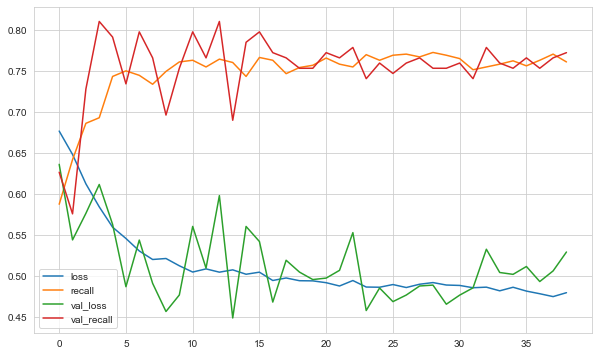

In [75]:
loss_bc = pd.DataFrame(model.history.history)
loss_bc.plot();

In [76]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1329  264]
 [ 155  252]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1593
           1       0.49      0.62      0.55       407

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.70      2000
weighted avg       0.81      0.79      0.80      2000



#### Monitor the "val_recall" as metric

In [77]:
reset_seeds() 

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005) 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [79]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [80]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
72/72 [==============================] - 1s 9ms/step - loss: 0.6767 - recall: 0.5876 - val_loss: 0.6362 - val_recall: 0.6266
Epoch 2/300
72/72 [==============================] - 0s 4ms/step - loss: 0.6482 - recall: 0.6420 - val_loss: 0.5443 - val_recall: 0.5759
Epoch 3/300
72/72 [==============================] - 0s 4ms/step - loss: 0.6125 - recall: 0.6861 - val_loss: 0.5765 - val_recall: 0.7278
Epoch 4/300
72/72 [==============================] - 0s 4ms/step - loss: 0.5845 - recall: 0.6929 - val_loss: 0.6117 - val_recall: 0.8101
Epoch 5/300
72/72 [==============================] - 0s 4ms/step - loss: 0.5597 - recall: 0.7432 - val_loss: 0.5632 - val_recall: 0.7911
Epoch 6/300
72/72 [==============================] - 0s 4ms/step - loss: 0.5460 - recall: 0.7500 - val_loss: 0.4873 - val_recall: 0.7342
Epoch 7/300
72/72 [==============================] - 0s 4ms/step - loss: 0.5308 - recall: 0.7446 - val_loss: 0.5440 - val_recall: 0.7975
Epoch 8/300
72/72 [======================

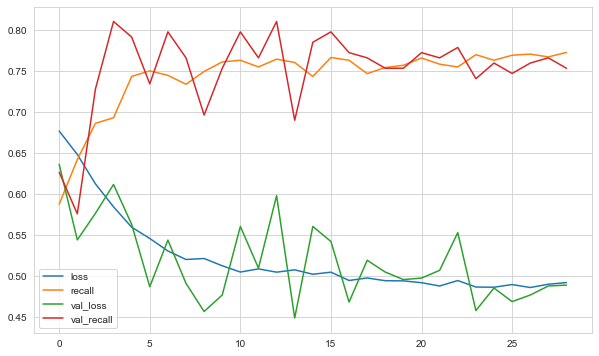

In [81]:
loss_bc = pd.DataFrame(model.history.history)
loss_bc.plot();

In [82]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[992 601]
 [ 92 315]]
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1593
           1       0.34      0.77      0.48       407

    accuracy                           0.65      2000
   macro avg       0.63      0.70      0.61      2000
weighted avg       0.80      0.65      0.69      2000



## GridSearchCV

In [83]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [84]:
def build_classifier(optimizer, learn_rate):
    reset_seeds() 
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [85]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [86]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [87]:
reset_seeds() 

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weight)
    


Fitting 5 folds for each of 24 candidates, totalling 120 fits


2022-10-04 18:51:13.764673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 18:51:13.764675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 18:51:13.764673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

AttributeError: module 'sklearn.utils.class_weight' has no attribute 'keys'

In [88]:
grid_model.best_score_

nan

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___